<a href="https://colab.research.google.com/github/trefftzc/cis263/blob/main/Art_Gallery_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ART GALLERY PROBLEM
The Art Gallery Problem is a classic problem in computational geometry that involves the challenge of determining the minimum number of guards needed to cover or observe the entire interior of an art gallery, represented as a polygon. This problem has significant implications in various fields, such as robotics, computer vision, and surveillance.

https://www.geeksforgeeks.org/art-gallery-problem/

Problem Description:

The Art Gallery Problem is formulated in geometry as the minimum number of guards that need to be placed in an n-vertex simple polygon such that all points of the interior are visible. A simple polygon is a connected closed region whose boundary is defined by a finite number of line segments. It is a family of related visibility problems in computational geometry. Visibility is defined such that two points u and v are mutually visible if the line segment joining them lies inside the polygon. Here, we discuss several variants. The common terms used in the variants discussed below:

A simple (not necessarily convex) polygon P to describe the art gallery. A set of points S to describe the guards where each guard is represented by a point in P. A rule that a point A ∈ S can guard another point B ∈ P if and only if A ∈ S, B ∈ P and line segment AB is contained in P. A question on whether all points in polygon P are guarded by S.

For the purposes of this project, we will consider only polygons without any holes.

# Triangulation-based Approach

One of the most common methods to solve the Art Gallery Problem involves triangulating the polygon.



#Triangle a python library that generates triangulations

The library
 is available here: https://rufat.be/triangle/delaunay.html


From the main page of Triangle:

Triangle is a python wrapper around Jonathan Richard Shewchuk’s two-dimensional quality mesh generator and delaunay triangulator library, available here. This implementation utilizes Cython to wrap the C API as closely as possible. The source is available on Github, and the documentation can be accessed at rufat.be/triangle.

In [2]:
!pip install triangle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.9 MB/s eta 0:00:00


From Wikipedia: https://en.wikipedia.org/wiki/Constrained_Delaunay_triangulation

# Constrained Delaunay triangulation


From Wikipedia, the free encyclopedia
In computational geometry, a constrained Delaunay triangulation is a generalization of the Delaunay triangulation that forces certain required segments into the triangulation as edges,[1][2] unlike the Delaunay triangulation itself which is based purely on the position of a given set of vertices without regard to how they should be connected by edges. It can be computed efficiently and has applications in geographic information systems and in mesh generation.

Definition
The input to the constrained Delaunay triangulation problem is a planar straight-line graph, a set of points and non-crossing line segments in the plane. The constrained Delaunay triangulation of this input is a triangulation of its convex hull, including all of the input segments as edges, and using only the vertices of the input. For every additional edge
e added to this input to make it into a triangulation, there should exist a circle through the endpoints of e, such that any vertex interior to the circle is blocked from visibility from at least one endpoint of e
 by a segment of the input. This generalizes the defining property of two-dimensional Delaunay triangulations of points, that each edge have a circle through its two endpoints containing no other vertices. A triangulation satisfying these properties always exists.[1]

Jonathan Shewchuk has generalized this definition to constrained Delaunay triangulations of three-dimensional inputs, systems of points and non-crossing segments and triangles in three-dimensional space; however, not every input of this type has a constrained Delaunay triangulation according to his generalized definition.[2]

Algorithms
Several algorithms for computing constrained Delaunay triangulations of planar straight-line graphs in time
O(n log n) are known.[1][3] The constrained Delaunay triangulation of a simple polygon can be constructed in linear time.[4]

Applications
In topographic surveying, one constructs a triangulation from points shot in the field. If an edge of the triangulation crosses a river, the resulting surface does not accurately model the path of the river. So one draws break lines along rivers, edges of roads, mountain ridges, and the like. The break lines are used as constraints when constructing the triangulation.

Constrained Delaunay triangulation can also be used in Delaunay refinement methods for mesh generation, as a way to force the mesh to conform with the domain boundaries as it is being refined.

References
 Chew, L. Paul (1989), "Constrained Delaunay triangulations", Algorithmica, 4 (1): 97–108, doi:10.1007/BF01553881, MR 0983658, S2CID 189918468

 Shewchuk, Jonathan Richard (2008), "General-dimensional constrained Delaunay and constrained regular triangulations. I. Combinatorial properties", Discrete & Computational Geometry, 39 (1–3): 580–637, doi:10.1007/s00454-008-9060-3, MR 2383774

 Wang, Cao An; Schubert, Lenhart K. (1987), "An optimal algorithm for constructing the Delaunay triangulation of a set of line segments", in Soule, D. (ed.), Proceedings of the Third Annual Symposium on Computational Geometry, Waterloo, Ontario, Canada, June 8-10, 1987, ACM, pp. 223–232, doi:10.1145/41958.41982, ISBN 0-89791-231-4, S2CID 18490297

 Chin, Francis; Wang, Cao An (1999), "Finding the constrained Delaunay triangulation and constrained Voronoi diagram of a simple polygon in linear time", SIAM Journal on Computing, 28 (2): 471–486, doi:10.1137/S0097539795285916, hdl:10722/47094, MR 1634357, S2CID 28966377

This is an example from the Triangle library. 'box' is a predefined polygon and a set of segments that shall be part of the Delaunay triangulation.
The specification also includes a point in a hole in the polygon.

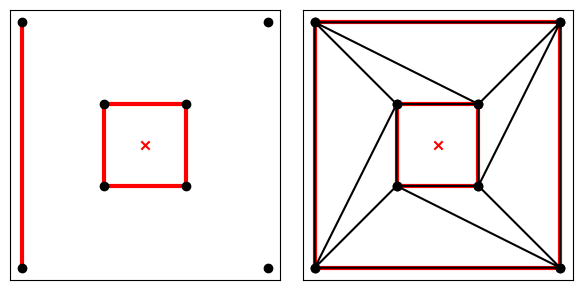

In [3]:
import matplotlib.pyplot as plt
import triangle as tr

box = tr.get_data('box')
t = tr.triangulate(box, 'pc')
# print(box)
tr.compare(plt, box, t)
plt.show()

# A more complex example

This is a more complex example.

Besides using the method **compare** in the Triangle library, we used matplotlib to plot:
1. The original polygon
2. The triangulation of the original polygon
3. The location of two guards that guard the entire polygon (the entire gallery)

The triangles for the polygon produced by the library:
[[0 5 7]
 [5 0 1]
 [6 7 5]
 [4 1 2]
 [1 4 5]
 [2 3 4]]


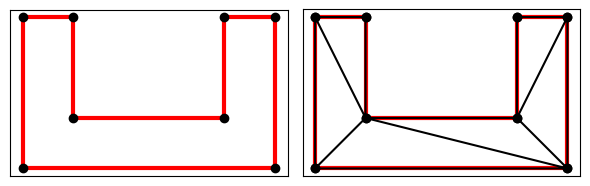

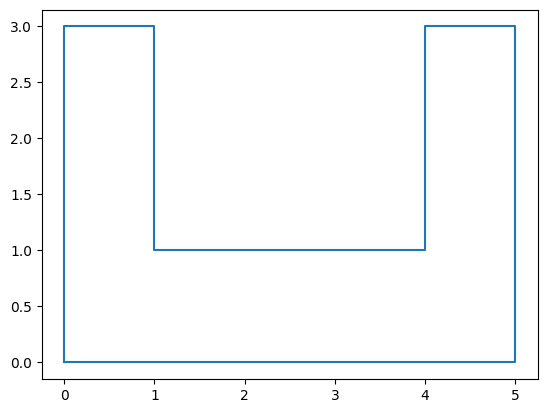

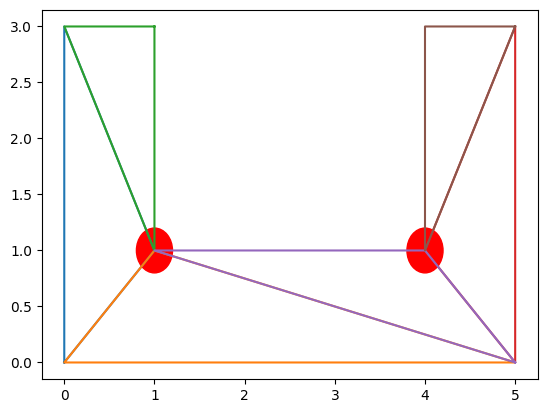

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import triangle as tr
from shapely.geometry import Polygon
polygon_points = np.array([
    [0, 0], [5,0], [5,3], [4,3],[4,1], [1, 1],[1,3],[0,3]])
N = polygon_points.shape[0]

# segments
i = np.arange(N)
seg = np.stack([i, i + 1], axis=1) % N
A = dict(vertices=np.array((polygon_points)),segments=seg)
B = tr.triangulate(A,'p')
# print(B)
triangles = (B['triangles'])
print("The triangles for the polygon produced by the library:")
print(triangles)
tr.compare(plt, A, B)
plt.show()
# And then you can plot them separately
original_polygon = Polygon(polygon_points)
x,y = original_polygon.exterior.xy
plt.plot(x,y)
plt.show()
# And to plot the triangles
for t in triangles:
    triangle_points = Polygon(polygon_points[t])
    x,y = triangle_points.exterior.xy
    plt.plot(x,y)
fig = plt.gcf()
ax = fig.gca()
# Now highlight some vertices (the locations of the guards)
for i in [4,5]:
  circle = plt.Circle(polygon_points[i], 0.2, color='r')
  ax.add_patch(circle)
plt.show()

# A second instance
In this second instance we consider a convex polygon.

The actual optimal solution is that one single guard is sufficient to guard any convex polygon.

The approach used here depends on the triangulation, and with the triangulation produced by **Triangle** library, the code will not find an optimal solution. It will find a sub-optimal solution.

The triangles for the polygon produced by the library:
[[7 0 5]
 [5 6 7]
 [0 1 5]
 [1 2 3]
 [3 4 1]
 [1 4 5]]


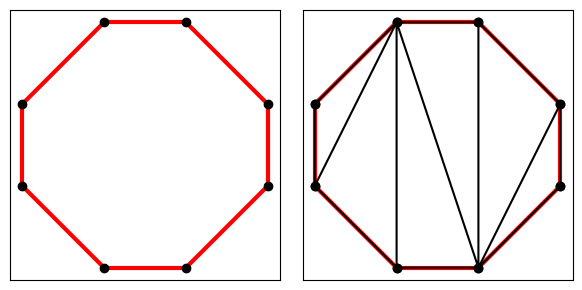

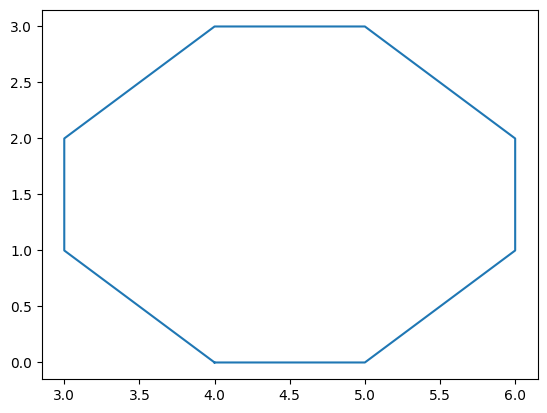

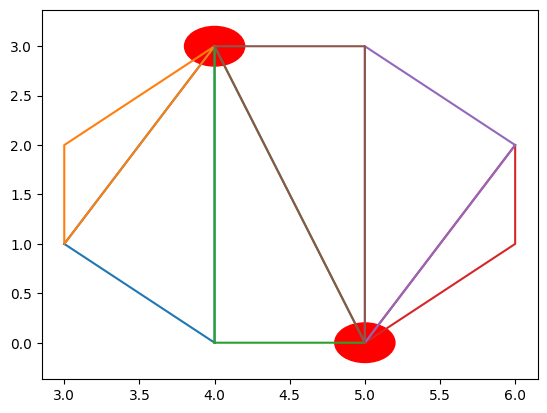

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr
from shapely.geometry import Polygon

polygon_points = np.array([
    [4, 0], [5,0], [6,1], [6,2],[5,3], [4, 3],[3,2],[3,1]])
N = polygon_points.shape[0]

# segments
i = np.arange(N)
seg = np.stack([i, i + 1], axis=1) % N
A = dict(vertices=np.array((polygon_points)),segments=seg)
B = tr.triangulate(A,'p')
triangles = (B['triangles'])
print("The triangles for the polygon produced by the library:")
print(triangles)
tr.compare(plt, A, B)
plt.show()

original_polygon = Polygon(polygon_points)
x,y = original_polygon.exterior.xy
plt.plot(x,y)
plt.show()
# And to plot the triangles
for t in triangles:
    triangle_points = Polygon(polygon_points[t])
    x,y = triangle_points.exterior.xy
    plt.plot(x,y)
fig = plt.gcf()
ax = fig.gca()
# Now highlight some vertices (the locations of the guards)
# circle = plt.Circle(polygon_points[4], 0.2, color='r')
# ax.add_patch(circle)
# circle = plt.Circle(polygon_points[5], 0.2, color='r')
# ax.add_patch(circle)

for i in [1,5]:
  circle = plt.Circle(polygon_points[i], 0.2, color='r')
  ax.add_patch(circle)
plt.show()

## A third instance
This third instance requires three guards.

The triangles for the polygon produced by the library:
[[ 0  8  9]
 [ 8  0  1]
 [ 0  9 11]
 [10 11  9]
 [ 8  5  7]
 [ 5  1  4]
 [ 1  5  8]
 [ 4  1  2]
 [ 2  3  4]
 [ 5  6  7]]


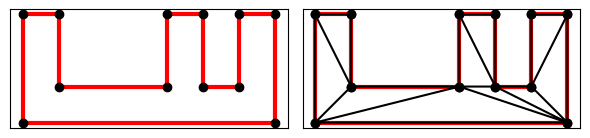

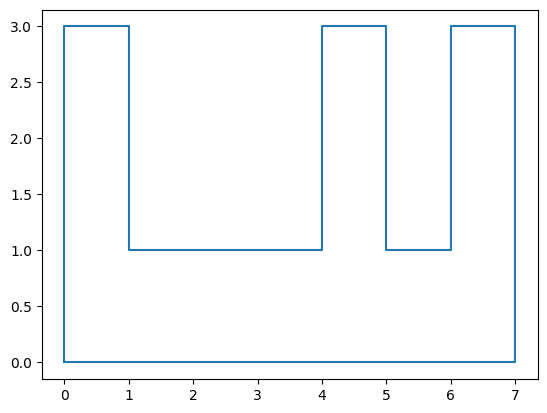

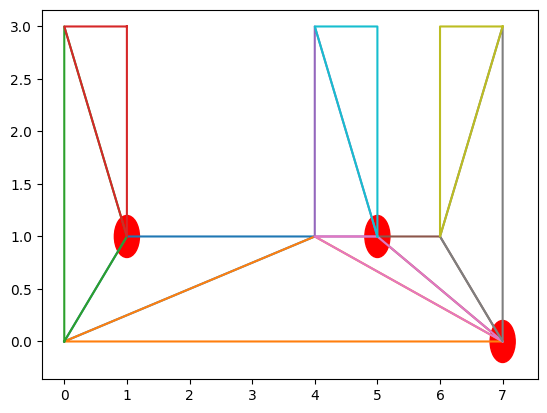

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr
from shapely.geometry import Polygon

polygon_points = np.array([
    [0,0],[7,0],[7,3],[6,3],[6,1],[5,1],[5,3], [4,3],[4,1], [1, 1],[1,3],[0,3]])
N = polygon_points.shape[0]

# segments
i = np.arange(N)
seg = np.stack([i, i + 1], axis=1) % N
A = dict(vertices=np.array((polygon_points)),segments=seg)
B = tr.triangulate(A,'p')
triangles = (B['triangles'])
print("The triangles for the polygon produced by the library:")
print(triangles)
tr.compare(plt, A, B)
plt.show()

original_polygon = Polygon(polygon_points)
x,y = original_polygon.exterior.xy
plt.plot(x,y)
plt.show()
# And to plot the triangles
for t in triangles:
    triangle_points = Polygon(polygon_points[t])
    x,y = triangle_points.exterior.xy
    plt.plot(x,y)
fig = plt.gcf()
ax = fig.gca()
# Now highlight some vertices (the locations of the guards)
# circle = plt.Circle(polygon_points[4], 0.2, color='r')
# ax.add_patch(circle)
# circle = plt.Circle(polygon_points[5], 0.2, color='r')
# ax.add_patch(circle)

for i in [1,5,9]:
  circle = plt.Circle(polygon_points[i], 0.2, color='r')
  ax.add_patch(circle)
plt.show()

Now, instead, of hard-coding the vertices of the polygon, let's write a version that reads the vertices from a file. The name of the file that contains the number of vertices and the coordinates of the vertices is passed in the command line.


In [15]:
%%writefile art_gallery.py
import sys
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr
from shapely.geometry import Polygon

def read_polygon_vertices(file_name):
  file_object = open(file_name, "r")
  # Input the number of rows and columns
  n_of_vertices = int(file_object.readline())
  vertices = []
  # Input the matrix elements
  for i in range(n_of_vertices):
    point = list(map(int, file_object.readline().split()))
    vertices.append(point)

  return vertices,n_of_vertices


vertices,N = read_polygon_vertices(sys.argv[1])
polygon_points = np.array(vertices)


# segments
i = np.arange(N)
seg = np.stack([i, i + 1], axis=1) % N
A = dict(vertices=np.array((polygon_points)),segments=seg)
B = tr.triangulate(A,'p')
# print(B)
triangles = (B['triangles'])
print("The triangles for the polygon produced by the library:")
print(triangles)
tr.compare(plt, A, B)
plt.show()
# And then you can plot them separately
original_polygon = Polygon(polygon_points)
x,y = original_polygon.exterior.xy
plt.plot(x,y)
plt.show()
# And to plot the triangles
for t in triangles:
    triangle_points = Polygon(polygon_points[t])
    x,y = triangle_points.exterior.xy
    plt.plot(x,y)
fig = plt.gcf()
ax = fig.gca()
# Now highlight some vertices (the locations of the guards)

# Your code will go here.
# Your code will find a subset of vertices that covers the entire polygon
# Ideally it should be of minimum size
#
# The code below just shows how to higlight
# the vertices that are part of the solution
#

for i in [4,5]:
  circle = plt.Circle(polygon_points[i], 0.2, color='r')
  ax.add_patch(circle)
plt.show()

Overwriting art_gallery.py


And now, we create three text files with the vertices of the polygons.

In [8]:
%%writefile closed_octagon.Text
8
4 0
5 0
6 1
6 2
5 3
4 3
3 2
3 1

Writing closed_octagon.Text


In [9]:
%%writefile big_c.Text
8
0 0
5 0
5 3
4 3
4 1
1 1
1 3
0 3

Writing big_c.Text


In [10]:
%%writefile twelve_vertices.Text
12
0 0
7 0
7 3
6 3
6 1
5 1
5 3
4 3
4 1
1 1
1 3
0 3

Writing twelve_vertices.Text


Now, let's execute with reading the vertices from files

In [16]:
!python art_gallery.py closed_octagon.Text

The triangles for the polygon produced by the library:
[[7 0 5]
 [5 6 7]
 [0 1 5]
 [1 2 3]
 [3 4 1]
 [1 4 5]]
Figure(600x300)
Figure(640x480)
Figure(640x480)


In [12]:
!python art_gallery.py big_c.Text

The triangles for the polygon produced by the library:
[[0 5 7]
 [5 0 1]
 [6 7 5]
 [4 1 2]
 [1 4 5]
 [2 3 4]]
Figure(600x300)
Figure(640x480)
Figure(640x480)


In [13]:
!python art_gallery.py twelve_vertices.Text

The triangles for the polygon produced by the library:
[[ 0  8  9]
 [ 8  0  1]
 [ 0  9 11]
 [10 11  9]
 [ 8  5  7]
 [ 5  1  4]
 [ 1  5  8]
 [ 4  1  2]
 [ 2  3  4]
 [ 5  6  7]]
Figure(600x300)
Figure(640x480)
Figure(640x480)


In [14]:
!ls

art_gallery.py	big_c.Text  closed_octagon.Text  sample_data  twelve_vertices.Text




The real challenge of the project is to write a function that will take as input the triangles produced by the library and return a list that contains the indices of the vertices that will cover the entire polygon.
